In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carga de datos
data = pd.read_csv('/Users/servandolopez/Documents/Proyectos/climatesim/data/raw/jojutlaestacion17031.csv')

print(data.head(), '\n')
print(data.info(), '\n')
print(data.describe())

        FECHA  PRECIP  EVAP  TMAX  TMIN
0  01/03/1977     0.0   6.9  32.0  11.0
1  02/03/1977     0.0   7.2  32.0  12.0
2  03/03/1977     0.0   8.9  33.0  12.0
3  04/03/1977     0.0   6.1  33.0  11.0
4  05/03/1977     0.0   5.2  35.0  12.0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14520 entries, 0 to 14519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FECHA   14520 non-null  object 
 1   PRECIP  14520 non-null  float64
 2   EVAP    12811 non-null  float64
 3   TMAX    14463 non-null  float64
 4   TMIN    14520 non-null  float64
dtypes: float64(4), object(1)
memory usage: 567.3+ KB
None 

             PRECIP          EVAP          TMAX          TMIN
count  14520.000000  12811.000000  14463.000000  14520.000000
mean       2.461804      5.176520     33.369322     15.268740
std        7.256125      1.688509      3.063514      3.861298
min        0.000000      0.200000     17.500000      2.000000
25%        0.000000 

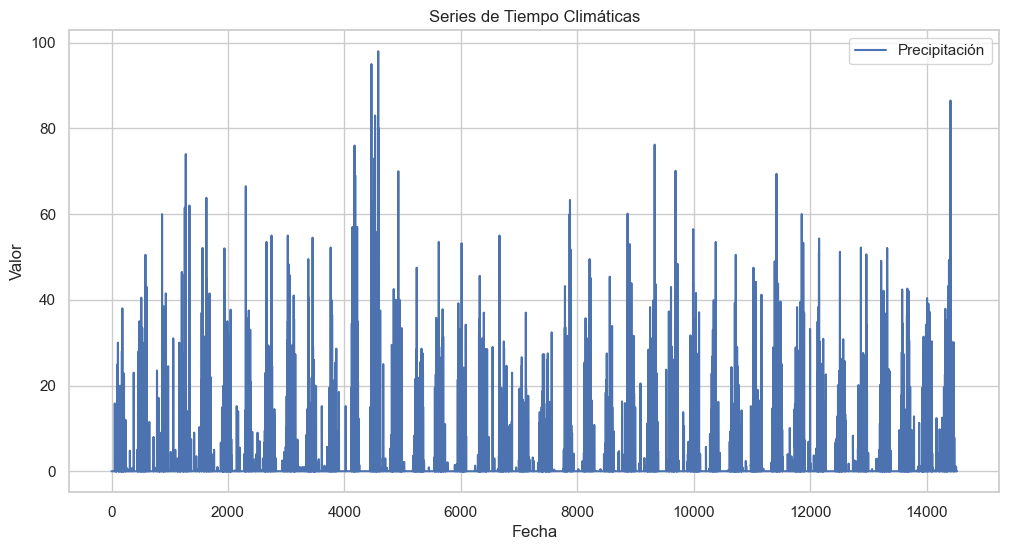

In [24]:
sns.set(style='whitegrid')
%matplotlib inline

plt.figure(figsize=(12,6))
plt.plot(data['PRECIP'], label='Precipitación')
plt.title('Series de Tiempo Climáticas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

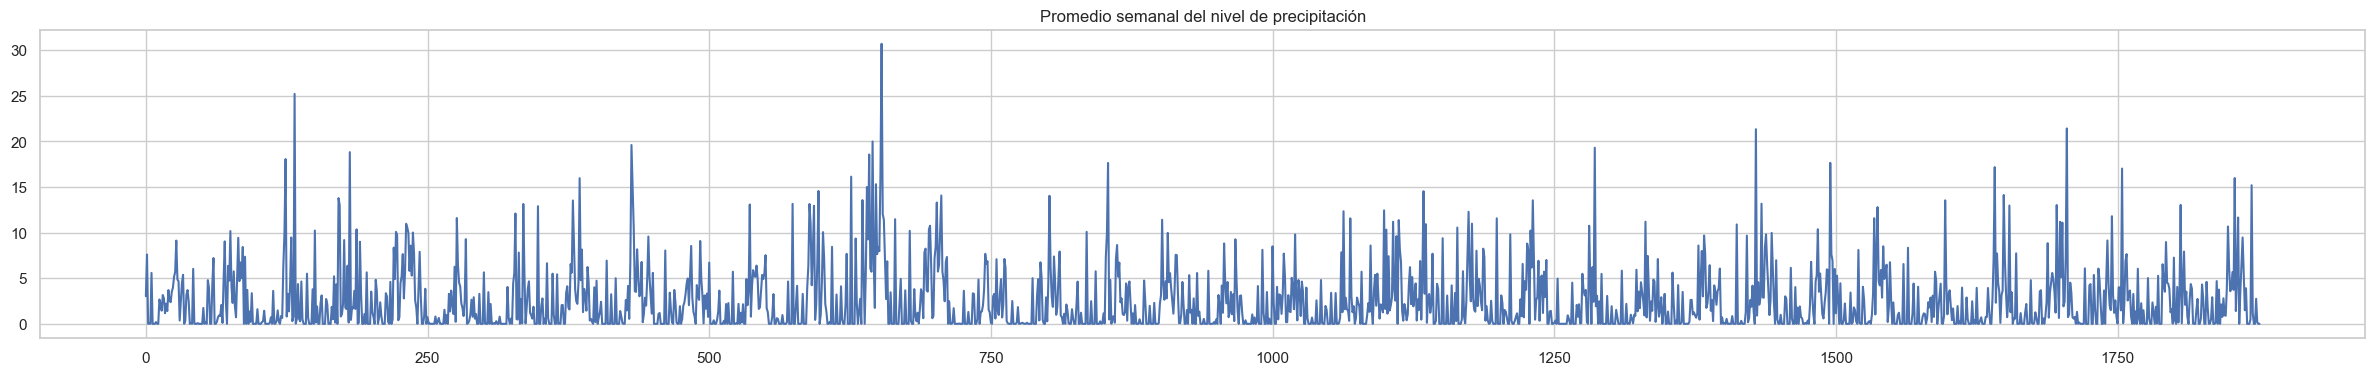

In [44]:
#Con el proposito de simplicar los datos y eliminar ruido del dataset, se tomarán los promedios mensuales del nivel de cada una de las variables

data_mean = data.groupby(pd.PeriodIndex(data['FECHA'], freq="W"))[['PRECIP', 'EVAP', 'TMIN', 'TMAX']].mean().dropna()
precip = np.array(data_mean['PRECIP'])
plt.figure(figsize=(30, 4))
plt.plot(precip)
plt.title('Promedio semanal del nivel de precipitación')
plt.show()

In [ ]:
#Ahora normalizamos las variables


FECHA
1977-01-03/1977-01-09    3.028571
1977-01-10/1977-01-16    7.600000
1977-01-31/1977-02-06    0.000000
1977-02-07/1977-02-13    0.050000
1977-02-28/1977-03-06    0.000000
                           ...   
2016-11-28/2016-12-04    0.000000
2016-12-05/2016-12-11    2.742857
2016-12-12/2016-12-18    0.157143
2016-12-19/2016-12-25    0.000000
2016-12-26/2017-01-01    0.000000
Freq: W-SUN, Name: PRECIP, Length: 1877, dtype: float64